In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
import glob
from math import sqrt
SPINE_COLOR = 'gray'

In [2]:
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'pdf',
              'text.latex.preamble': ['\\usepackage{gensymb}'],
              'axes.labelsize': 8, # fontsize for x and y labels (was 10)
              'axes.titlesize': 8,
              'font.size': 8,       #'text.fontsize': 8, # was 10
              'legend.fontsize': 6.5, # was 10
              'xtick.labelsize': 8,
              'ytick.labelsize': 8,
              'lines.linewidth' : 0.4,
              'lines.markersize' : 0.4,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

linewidth=497
DPI=96
#latexify(fig_width=linewidth/DPI, fig_height=int(linewidth/2.3/DPI))
latexify(fig_width=linewidth/DPI/1.7, fig_height=int(linewidth/2.3/DPI))

.\20191128_WiFi_full-eph_2min\
      seconds_offset  streamid  msg_number   ms_offset
0           0.113776         4           1     113.776
1           0.213495         8           2     213.495
2           0.313825        12           3     313.825
3           0.413486        16           4     413.486
4           0.513398        20           5     513.398
5           0.613797        24           6     613.797
6           0.713694        28           7     713.694
7           0.813563        32           8     813.563
8           0.913640        36           9     913.640
9           1.013762        40          10    1013.762
10          1.113589        44          11    1113.589
11          1.213758        48          12    1213.758
12          1.313771        52          13    1313.771
13          1.413848        56          14    1413.848
14          1.513709        60          15    1513.709
15          1.613778        64          16    1613.778
16          1.713495        68    

.\20191128_WiFi_non-eph_2min\
      seconds_offset  streamid  msg_number   ms_offset
0           0.131447         4           1     131.447
1           0.231438         4           2     231.438
2           0.331473         4           3     331.473
3           0.431412         4           4     431.412
4           0.531593         4           5     531.593
5           0.631482         4           6     631.482
6           0.731688         4           7     731.688
7           0.831414         4           8     831.414
8           0.931619         4           9     931.619
9           1.031474         4          10    1031.474
10          1.131495         4          11    1131.495
11          1.231475         4          12    1231.475
12          1.331198         4          13    1331.198
13          1.431642         4          14    1431.642
14          1.531669         4          15    1531.669
15          1.631442         4          16    1631.442
16          1.731417         4     

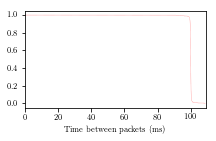

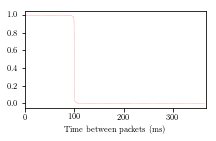

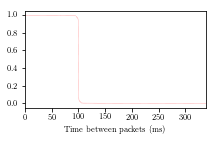

In [20]:
#CCDFs
# time between consecutive msgs (should be under the deadline)
for f in glob.iglob('./*20191128*/', recursive=True): # /*directoryRegExp*/ to reduce output (long runtime)
    dfapp = pd.read_csv(f+'serverAppOutput', delim_whitespace=True ,names = 
                                                    ['seconds_offset', 'streamid', 'length', 'msg_number'])
    dfstream = pd.read_csv(f+'serverStreamOutput', delim_whitespace=True ,names = 
                                                    ['seconds_offset', 'streamid', 'byte_offset', 'length', 'msg_number'])

    title=f
    del dfapp['length']
    print(f)
    
    #compute the time between two consecutive packets
    dfapp.sort_values(by='msg_number')
    dfapp['ms_offset'] = dfapp.seconds_offset.apply(lambda x: x * 1000) # from s to ms
    print(dfapp)
    
    i = dfapp.ms_offset[0];
    timeBetween = [];
    for j in dfapp['ms_offset']:
        timeBetween.append(j-i)
        i = j
        
    dfapp['timeBetweenMsgs'] = timeBetween
    sortedTimesBetweenMsgs = dfapp['timeBetweenMsgs'].sort_values()
    #print(sortedTimesBetweenMsgs)
    print(dfapp.sort_values(by='timeBetweenMsgs'))
    
    #build the CDF
    cum_dist = np.linspace(1.,0.,len(sortedTimesBetweenMsgs))
    cdf = pd.Series(cum_dist, index=sortedTimesBetweenMsgs)
    fig = plt.figure() #this line makes a plot for every file
    fig = cdf.plot(color='r', linestyle=':', drawstyle='steps')
    
    #fig.text(sortedRetrans.max()*0.75, 0.9, num_retrans, horizontalalignment='center', verticalalignment='center')

    fig.set_xlabel('Time between packets (ms)')
    plt.tight_layout()
    plt.savefig(f+"ccdf_timeBetweenMsgs.pdf")

.\20191128_WiFi_full-eph_2min\
539     13.062
553     13.202
771     13.225
46      13.251
174     13.299
132     13.337
430     13.337
600     13.342
540     13.343
90      13.348
380     13.352
150     13.354
538     13.354
871     13.365
196     13.370
388     13.380
151     13.390
668     13.397
4       13.398
643     13.400
528     13.400
431     13.401
790     13.401
1076    13.405
986     13.412
1025    13.414
474     13.415
729     13.417
559     13.418
153     13.430
         ...  
940     14.430
391     14.475
560     14.476
496     14.527
548     14.534
362     14.568
624     14.704
1193    14.747
752     14.748
647     14.895
1072    15.016
1136    15.210
1046    15.350
731     15.362
1146    15.544
1158    15.810
1157    16.056
552     16.124
506     17.476
935     17.516
769     17.716
178     17.810
37      18.633
1031    18.651
945     20.338
580     21.144
610     21.716
124     21.998
366     22.278
721     22.813
Name: perfectTimeDeviation, Length: 1199, dtype: float

.\20191128_WiFi_non-eph_2min\
195      31.009
12       31.198
1041     31.222
309      31.255
1045     31.256
1132     31.265
145      31.266
225      31.270
130      31.271
93       31.271
353      31.280
53       31.280
608      31.280
428      31.292
524      31.301
352      31.306
268      31.306
55       31.310
474      31.315
657      31.316
906      31.319
907      31.326
899      31.328
310      31.330
176      31.333
74       31.333
97       31.334
438      31.334
736      31.336
258      31.336
         ...   
220      34.348
689      34.447
71       34.641
426      34.792
502      34.794
23       34.943
780      35.244
526      35.382
124      35.457
482      35.590
867      35.658
269      35.669
333      36.148
17       36.180
1069     36.257
469      36.316
649      36.344
769      36.663
760      36.684
1165     37.334
969      38.675
171      39.383
869      39.840
1048     61.731
1169     65.850
497      69.714
1047    161.627
496     169.610
1046    261.451
495     26

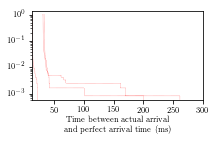

In [22]:
#CCDFs
# time between actual msgs arrival and perfect arrical time
for f in glob.iglob('./*20191128*/', recursive=True): # /*directoryRegExp*/ to reduce output (long runtime)
    dfapp = pd.read_csv(f+'serverAppOutput', delim_whitespace=True ,names = 
                                                    ['seconds_offset', 'streamid', 'length', 'msg_number'])
    dfstream = pd.read_csv(f+'serverStreamOutput', delim_whitespace=True ,names = 
                                                    ['seconds_offset', 'streamid', 'byte_offset', 'length', 'msg_number'])

    title=f
    del dfapp['length']
    
    #compute the time between actual arrival time and perfect arrival time
    dfapp.sort_values(by='msg_number')
    
    #starttime = dfapp.seconds_offset[0] - 0.1
    #print(starttime)
    
    dfapp['ms_offset'] = dfapp.seconds_offset.apply(lambda x: x * 1000) # from s to ms
    dfapp['perfectTimeDeviation'] = dfapp.ms_offset - dfapp.msg_number * 100
    #print(dfapp)

    sortedTimeDeviation = dfapp['perfectTimeDeviation'].sort_values()
    print(f)
    print(sortedTimeDeviation)
    print(dfapp)
    
    #build the CDF
    cum_dist = np.linspace(1.,0.,len(sortedTimeDeviation))
    cdf = pd.Series(cum_dist, index=sortedTimeDeviation)
    #fig = plt.figure() #this line makes a plot for every file
    fig = cdf.plot(color='r', linestyle=':', drawstyle='steps')
    
    #fig.text(sortedRetrans.max()*0.75, 0.9, num_retrans, horizontalalignment='center', verticalalignment='center')

    fig.set_xlabel('Time between actual arrival \n and perfect arrival time (ms)')
    plt.tight_layout()
    
    #plt.savefig(f+"ccdf_perfectTimeDeviation.pdf")
    
    fig.set_yscale('log')
    plt.savefig(f+"all_ccdf_perfectTimeDeviation_ylog.pdf")

In [ ]:
#PING: single experiment
#SCATTERPLOT - PING + rtt values over time
'''
for f in glob.iglob('./*1016-*/*firstKPIs', recursive=True): # /*directoryRegExp*/ to reduce output (long runtime)
    df = pd.read_csv(f, delim_whitespace=True, names = ['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 
                                                        'rtt_min', 'current_rtt', 'send_time','reception_time', 
                                                        'ack_delay', 'srtt', 'rtt_var', 'state'])
                                                        # KPIs FROM BEFORE 18.10.2019!
                                                        
    #dping = pd.read_csv('./20191015-1314_1hr_ping/20191015-1314_client_ping_grep', delim_whitespace=True, 
                        names = ['seconds_offset', 'ping_number', 'ping_rtt'])
    
    df.current_rtt = df.current_rtt.apply(lambda x: x / 1000) #from us to ms
    df.srtt = df.srtt.apply(lambda x: x / 1000)
    title=f
    print(f)
    
    print(df.current_rtt.mean(),
          df.srtt.mean(),
          dping.ping_rtt.mean())
    
    
    fig = dping.plot(x="ping_number", y="ping_rtt", kind='scatter', color="DarkBlue", s=0.01)
    x = df.seconds_offset
    y1 = df.current_rtt
    fig.plot(x,y1,'r:') # more examples = 'b:' 'k:' 'r--'
    y2 = df.srtt
    fig.plot(x,y2, 'y:')

    axes = plt.gca()
    fig.legend(['Current RTT', 'Smoothed RTT', 'Ping RTT'])
    fig.set_xlabel('Runtime (seconds)')
    lines = fig.set_ylabel('Time (ms)')
    plt.tight_layout()
    plt.savefig(f+"_timing+ping.pdf")
    
    axes.set_ylim([0,250])
    #axes.set_xlim([-5,605])
    plt.savefig(f+"_timing+ping_limit.pdf")
'''

In [ ]:
#WiFi vs ETH
#BOXPLOT - application RTT (current rtt)
dfe100 = pd.read_csv('./analysis_wifi-vs-eth/eth_100ms_36k-msgs/firstKPIs', delim_whitespace=True, names = ['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 
                                                        'rtt_min', 'current_rtt', 'send_time','reception_time', 
                                                        'current_ackdelay', 'srtt', 'rtt_var', 'max_ackdelay', 'state']) 
dfe200 = pd.read_csv('./analysis_wifi-vs-eth/eth_200ms_36k-msgs/firstKPIs', delim_whitespace=True, names = ['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 
                                                        'rtt_min', 'current_rtt', 'send_time','reception_time', 
                                                        'current_ackdelay', 'srtt', 'rtt_var', 'max_ackdelay', 'state'])
dfe500 = pd.read_csv('./analysis_wifi-vs-eth/eth_500ms_36k-msgs/firstKPIs', delim_whitespace=True, names = ['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 
                                                        'rtt_min', 'current_rtt', 'send_time','reception_time', 
                                                        'current_ackdelay', 'srtt', 'rtt_var', 'max_ackdelay', 'state'])
dfw100 = pd.read_csv('./analysis_wifi-vs-eth/wifi_100ms_36k-msgs/firstKPIs', delim_whitespace=True, names = ['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 
                                                        'rtt_min', 'current_rtt', 'send_time','reception_time', 
                                                        'current_ackdelay', 'srtt', 'rtt_var', 'max_ackdelay', 'state'])
dfw200 = pd.read_csv('./analysis_wifi-vs-eth/wifi_200ms_36k-msgs/firstKPIs', delim_whitespace=True, names = ['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 
                                                        'rtt_min', 'current_rtt', 'send_time','reception_time', 
                                                        'current_ackdelay', 'srtt', 'rtt_var', 'max_ackdelay', 'state'])
dfw500 = pd.read_csv('./analysis_wifi-vs-eth/wifi_500ms_36k-msgs/firstKPIs', delim_whitespace=True, names = ['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 
                                                        'rtt_min', 'current_rtt', 'send_time','reception_time', 
                                                        'current_ackdelay', 'srtt', 'rtt_var', 'max_ackdelay', 'state'])

dfe100 = dfe100[dfe100.index % 2 != 0]
dfe100 = dfe100[dfe100.state == 15]
dfe200 = dfe200[dfe200.index % 2 != 0]
dfe200 = dfe200[dfe200.state == 15]
dfe500 = dfe500[dfe500.index % 2 != 0]
dfe500 = dfe500[dfe500.state == 15]

dfw100 = dfw100[dfw100.index % 2 != 0]
dfw100 = dfw100[dfw100.state == 15]
dfw200 = dfw200[dfw200.index % 2 != 0]
dfw200 = dfw200[dfw200.state == 15]
dfw500 = dfw500[dfw500.index % 2 != 0]
dfw500 = dfw500[dfw500.state == 15]

df = pd.DataFrame()
df['dfe100'] = dfe100.current_rtt.apply(lambda x: x / 1000) #from us to ms
df['dfe200'] = dfe200.current_rtt.apply(lambda x: x / 1000) #from us to ms
df['dfe500'] = dfe500.current_rtt.apply(lambda x: x / 1000) #from us to ms
df['dfw100'] = dfw100.current_rtt.apply(lambda x: x / 1000) #from us to ms
df['dfw200'] = dfw200.current_rtt.apply(lambda x: x / 1000) #from us to ms
df['dfw500'] = dfw500.current_rtt.apply(lambda x: x / 1000) #from us to ms

print('Ethernet 100ms: ', df.dfe100.min(), '(min) ', df.dfe100.max(), '(max) ', df.dfe100.median(), '(median) ', '\n',
      'Ethernet 200ms: ', df.dfe100.min(), '(min) ', df.dfe200.max(), '(max) ', df.dfe200.median(), '(median) ', '\n',
      'Ethernet 500ms: ', df.dfe100.min(), '(min) ', df.dfe500.max(), '(max) ', df.dfe500.median(), '(median) ', '\n',
      'WiFi 100ms: ', df.dfw100.min(), '(min) ', df.dfw100.max(), '(max) ', df.dfw100.median(), '(median) ', '\n',
      'WiFi 200ms: ', df.dfw200.min(), '(min) ', df.dfw200.max(), '(max) ', df.dfw200.median(), '(median) ', '\n',
      'WiFi 500ms: ', df.dfw500.min(), '(min) ', df.dfw500.max(), '(max) ', df.dfw500.median(), '(median) ', '\n')


#print(df.to_string())

fig = df.boxplot(showfliers=True, flierprops={'markersize': 1, 'marker': 'x',
                                              'markerfacecolor': 'none', 'markeredgecolor': 'black'}) 
                #showfliers=False -> circles outside of the boxplot
    
fig.set_yscale('log')

plt.xticks([1, 2, 3, 4, 5, 6], ['100', '200\nEthernet\n(interval in ms)', '500', '100', '200\nWiFi\n(interval in ms)', '500'])
fig.set_ylabel('RTT (ms)')
plt.tight_layout()
plt.savefig("./analysis_wifi-vs-eth/rtt_boxplots_wifi-vs-eth_100-200-500ms_ylog_fliers.pdf")


In [ ]:
#WiFi vs ETH
#BOXPLOT - application RTT (current rtt)

dfw200 = pd.read_csv('./eth-vs-wifi/20191025-1451_200ms-5min_wifi_firstKPIs', delim_whitespace=True, names = ['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 
                                                        'rtt_min', 'current_rtt', 'send_time','reception_time', 
                                                        'current_ackdelay', 'srtt', 'rtt_var', 'max_ackdelay', 'state'])
dfw200_long = pd.read_csv('./eth-vs-wifi/20191023-1635_200ms-2hr_wifi_firstKPIs', delim_whitespace=True, names = ['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 
                                                        'rtt_min', 'current_rtt', 'send_time','reception_time', 
                                                        'current_ackdelay', 'srtt', 'rtt_var', 'max_ackdelay', 'state'])
dfe200 = pd.read_csv('./eth-vs-wifi/20191029-1406_200ms-5min_eth_firstKPIs', delim_whitespace=True, names = ['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 
                                                        'rtt_min', 'current_rtt', 'send_time','reception_time', 
                                                        'current_ackdelay', 'srtt', 'rtt_var', 'max_ackdelay', 'state']) 

df = pd.DataFrame()
df['dfw200_long'] = dfw200_long.current_rtt.apply(lambda x: x / 1000) #from us to ms
df['dfw200'] = dfw200.current_rtt.apply(lambda x: x / 1000) #from us to ms
df['dfe200'] = dfe200.current_rtt.apply(lambda x: x / 1000) #from us to ms

print(df.to_string())

fig = df.boxplot()

plt.xticks([1, 2, 3], ['WiFi 200ms', 'WiFi 200ms', 'Eth 200ms'])
fig.set_ylabel('Time (ms)')
plt.tight_layout()
plt.savefig("./eth-vs-wifi/rtt_boxplots_200ms.pdf")


In [ ]:
#SCATTERPLOT - rtt values over time
for f in glob.iglob('./*1023-*200ms*/*firstKPIs', recursive=True): # /*directoryRegExp*/ to reduce output (long runtime)
    df = pd.read_csv(f, delim_whitespace=True, names = ['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 
                                                        'rtt_min', 'current_rtt', 'send_time','reception_time', 
                                                        'current_ackdelay', 'srtt', 'rtt_var', 'max_ackdelay', 'state']) 
                                                        #extraction of KPI: update from 18.10.19
        
    df.current_rtt = df.current_rtt.apply(lambda x: x / 1000) #from us to ms
    df.srtt = df.srtt.apply(lambda x: x / 1000)
    df.rtt_min = df.rtt_min.apply(lambda x: x / 1000)
    title=f
    print(f)
    
    print(df.current_rtt.mean(),
          df.srtt.mean())
    
    fig = df.plot(x="seconds_offset", y="rtt_min", kind='scatter', color="DarkBlue", s=0.01)
    x = df.seconds_offset
    y2 = df.srtt
    fig.plot(x,y2, 'y.')
    y1 = df.current_rtt
    fig.plot(x,y1, 'r.') # more examples = 'b:' 'k:' 'r--'

    axes = plt.gca()
    fig.legend(['Current RTT', 'Smoothed RTT', 'min RTT'])
    fig.set_xlabel('Runtime (seconds)')
    lines = fig.set_ylabel('Time (ms)')
    plt.tight_layout()
    plt.savefig(f+"_timing.pdf")
    
    axes.set_ylim([0,25])
    #axes.set_xlim([-5,1000])
    plt.savefig(f+"_timing_limit.pdf")

In [ ]:
#BOXPLOTS - rtt values (Current RTT + Smoothed RTT)
# 1 plot for x files
for f in glob.iglob('./*1018-*/*firstKPIs', recursive=True): # /*directoryRegExp*/ to reduce output (long runtime)
    df = pd.read_csv(f, delim_whitespace=True, names = ['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 
                                                        'rtt_min', 'current_rtt', 'send_time','reception_time', 
                                                        'current_ackdelay', 'srtt', 'rtt_var', 'max_ackdelay', 'state']) 
                                                        #extraction of KPI: update from 18.10.19
    df.current_rtt = df.current_rtt.apply(lambda x: x / 1000) #from us to ms
    df.srtt = df.srtt.apply(lambda x: x / 1000)
    title=f
    print(f)
    
    #delete unnecessary data
    df.drop(['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 'rtt_min', 
             'send_time', 'reception_time', 'current_ackdelay', 'rtt_var','max_ackdelay', 'state'], axis=1, inplace=True)
    
    #delete initial values
    df.drop(df.index[0], inplace=True)
    
    fig = plt.figure() #this line makes a plot for every file
    fig = df.boxplot()
    plt.xticks([1, 2], ['Current RTT', 'Smoothed RTT'])
    fig.set_ylabel('Time (ms)')
    plt.tight_layout()
    plt.savefig(f+"_timing_boxplots.pdf")

In [ ]:
#SCATTERPLOT - congestion window
for f in glob.iglob('./*1018-*/*firstKPIs', recursive=True): # /*directoryRegExp*/ to reduce output (long runtime)
    df = pd.read_csv(f, delim_whitespace=True, names = ['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 
                                                        'rtt_min', 'current_rtt', 'send_time','reception_time', 
                                                        'current_ackdelay', 'srtt', 'rtt_var', 'max_ackdelay', 'state']) 
                                                        #extraction of KPI: update from 18.10.19
    title=f
    print(f)
    
    fig = df.plot(x="seconds_offset", y="cwin", marker=",", markersize="0.01", color="DarkBlue", linestyle="None")

    axes = plt.gca()
    #axes.set_ylim([0,20])
    #axes.set_xlim([-5,605])
    axes.get_legend().remove()
    
    fig.set_xlabel('Runtime (seconds)')
    lines = fig.set_ylabel('Congestion Window')
    plt.tight_layout()
    plt.savefig(f+"_cwin.pdf")
    
    fig.set_yscale('log')
    plt.savefig(f+"_cwin_ylog.pdf")

In [ ]:
#SCATTERPLOT retransmissions over time
for f in glob.iglob('./*1018-*/*firstKPIs', recursive=True): # /*directoryRegExp*/ to reduce output (long runtime)
    df = pd.read_csv(f, delim_whitespace=True, names = ['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 
                                                        'rtt_min', 'current_rtt', 'send_time','reception_time', 
                                                        'current_ackdelay', 'srtt', 'rtt_var', 'max_ackdelay', 'state']) 
                                                        #extraction of KPI: update from 18.10.19
    title=f
    print(f)
    
    df.drop_duplicates(subset="nb_ret", keep="first", inplace=True)
    df.drop(df.index[0], inplace=True)
    df.state = df.state.apply(lambda x: x - 14)
    
    num_retrans = 'Retransmissions = '+ str(df.state.count())
    print(num_retrans, "\n")
    
    fig = df.plot(x="seconds_offset", y="state", marker="x", markersize="0.1", color="DarkBlue", linestyle="None")
    
    fig.text(df['seconds_offset'].max()*0.75, 0.95, num_retrans, horizontalalignment='center', verticalalignment='center')
    fig.set_xlabel('Runtime (seconds)')
    lines = fig.set_ylabel('Retransmission=1')
    plt.tight_layout()
    plt.savefig(f+"_retransOverTime.pdf")


In [ ]:
# CUMULATIVE DISTRIBUTION FUNCTION - time between retransmissions
# 1 plot for x files
for f in glob.iglob('./*1018-*/*firstKPIs', recursive=True): # /*directoryRegExp*/ to reduce output (long runtime)
    df = pd.read_csv(f, delim_whitespace=True, names = ['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 
                                                        'rtt_min', 'current_rtt', 'send_time','reception_time', 
                                                        'current_ackdelay', 'srtt', 'rtt_var', 'max_ackdelay', 'state']) 
                                                        #extraction of KPI: update from 18.10.19
    title=f
    
    #delete the normal (no-retransmission) packets
    df.drop_duplicates(subset="nb_ret", keep="first", inplace=True)
    df.drop(df.index[0], inplace=True)
    df.state = df.state.apply(lambda x: x - 14)
    
    num_retrans = 'Retransmissions = '+ str(df.seconds_offset.count())
    print(num_retrans, "\n")
    
    #compute the time between retransmissions
    i = 0;
    timeBetween = [];
    for j in df['seconds_offset']:
        timeBetween.append(j-i)
        i = j
        
    df['timeBetween'] = timeBetween
    sortedRetrans = df['timeBetween'].sort_values()
    #print(sortedRetrans)
    #print(df.seconds_offset)
    
    #build the CDF
    cum_dist = np.linspace(0.,1.,len(sortedRetrans))
    cdf = pd.Series(cum_dist, index=sortedRetrans)
    fig = plt.figure() #this line makes a plot for every file
    fig = cdf.plot(color='r', linestyle=':', drawstyle='steps')
    
    fig.text(sortedRetrans.max()*0.75, 0, num_retrans, horizontalalignment='center', verticalalignment='center')

    fig.set_xlabel('Time between retransmissions (s)')
    plt.tight_layout()
    plt.savefig(f+"_cdf_retransTimeBetween.pdf")


In [ ]:
# COMPLEMENTARY CUMULATIVE DISTRIBUTION FUNCTION - time between retransmissions
# 1 plot for x files
for f in glob.iglob('./*1018-*/*firstKPIs', recursive=True): # /*directoryRegExp*/ to reduce output (long runtime)
    df = pd.read_csv(f, delim_whitespace=True, names = ['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 
                                                        'rtt_min', 'current_rtt', 'send_time','reception_time', 
                                                        'current_ackdelay', 'srtt', 'rtt_var', 'max_ackdelay', 'state']) 
                                                        #extraction of KPI: update from 18.10.19
    title=f
    
    #delete the normal (no-retransmission) packets
    df.drop_duplicates(subset="nb_ret", keep="first", inplace=True)
    df.drop(df.index[0], inplace=True)
    df.state = df.state.apply(lambda x: x - 14)
    
    num_retrans = 'Retransmissions = '+ str(df.seconds_offset.count())
    print(num_retrans, "\n")
    
    #compute the time between retransmissions
    i = 0;
    timeBetween = [];
    for j in df['seconds_offset']:
        timeBetween.append(j-i)
        i = j
        
    df['timeBetween'] = timeBetween
    sortedRetrans = df['timeBetween'].sort_values()
    #print(sortedRetrans)
    #print(df.seconds_offset)
    
    #build the CDF
    cum_dist = np.linspace(1.,0.,len(sortedRetrans))
    cdf = pd.Series(cum_dist, index=sortedRetrans)
    fig = plt.figure() #this line makes a plot for every file
    fig = cdf.plot(color='r', linestyle=':', drawstyle='steps')
    
    fig.text(sortedRetrans.max()*0.75, 0.9, num_retrans, horizontalalignment='center', verticalalignment='center')

    fig.set_xlabel('Time between retransmissions (s)')
    plt.tight_layout()
    plt.savefig(f+"_ccdf_retransTimeBetween.pdf")
    
    fig.set_yscale('log')
    plt.savefig(f+"_ccdf_retransTimeBetween_ylog.pdf")
    
    axes = plt.gca() 
    axes.set_xlim([0,100])
    fig.text(60, 0.9, num_retrans, horizontalalignment='center', verticalalignment='center')
    plt.savefig(f+"_ccdf_retransTimeBetween_yloglim.pdf")

In [ ]:
#SCATTERPLOT - rtt values over time
#COMPARISON to TIMING VALUES
for f in glob.iglob('./*1023-*200*/*firstKPIs', recursive=True): # /*directoryRegExp*/ to reduce output (long runtime)
    df = pd.read_csv(f, delim_whitespace=True, names = ['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 
                                                        'rtt_min', 'current_rtt', 'send_time','reception_time', 
                                                        'current_ackdelay', 'srtt', 'rtt_var', 'max_ackdelay', 'state']) 
                                                        #extraction of KPI: update from 18.10.19
    #calculate the comparison value
    df['recept_send'] = df.reception_time - df.send_time
    df['deviation'] = df.recept_send - df.current_rtt
    df = df[df.state == 15] #only values after successful start are comparable (earlier, there is no send or reception time set)
    
    df.current_rtt = df.current_rtt.apply(lambda x: x / 1000) #from us to ms
    df.srtt = df.srtt.apply(lambda x: x / 1000)
    df.rtt_min = df.rtt_min.apply(lambda x: x / 1000)
    df.recept_send = df.recept_send.apply(lambda x: x / 1000)
    df.deviation = df.deviation.apply(lambda x: x / 1000)
    df.current_ackdelay = df.current_ackdelay.apply(lambda x: x / 1000)
    df.max_ackdelay = df.max_ackdelay.apply(lambda x: x / 1000)
    
    title=f
    print(f)
    
    print('Current RTT mean: ' + str(df.current_rtt.mean()) + '\n',
          'SRTT mean: ' + str(df.srtt.mean()) + '\n',
         'Calculated reception-send mean: ' + str(df.recept_send.mean()) + '\n',
         'Deviation mean: ' + str(df.deviation.mean()) + '\n')
    
    standard = 0; #1 = standard plot over time
                  #0 = deviation plotted over time
    
    if(standard):
        fig = df.plot(x="seconds_offset", y="rtt_min", kind='scatter', color="DarkBlue", s=0.01)
        x = df.seconds_offset
        y1 = df.current_rtt
        fig.plot(x,y1,'r:') # more examples = 'b:' 'k:' 'r--'
        y2 = df.recept_send
        fig.plot(x,y2, 'y:')

        axes = plt.gca()
        fig.legend(['Current RTT', 'recept minus send', 'min RTT'])
        fig.set_xlabel('Runtime (seconds)')
        lines = fig.set_ylabel('Time (ms)')
        plt.tight_layout()
        plt.savefig(f+"_timing-comparison.pdf")
    
    #Plotting only deviation values
    else:
        df['deviation'] = df['deviation'].replace(0.0, np.nan) #set all 0.0 to NaN -> not plotted
        df.dropna(inplace=True)
        print(df[['seconds_offset', 'current_rtt', 'recept_send', 
                  'deviation', 'current_ackdelay', 'max_ackdelay']].to_string(index=False))

        fig = df.plot(x="seconds_offset", y="deviation", kind='scatter', color="DarkBlue", s=0.01)
        x = df.seconds_offset
        
        num_deviations = 'Differences = ' + str(df.deviation.count())
        print(num_deviations, "\n")
        #fig.text(df.seconds_offset.max()*0.9, df.deviation.max()*0.9, num_deviations, horizontalalignment='center', verticalalignment='center')

        axes = plt.gca()
        fig.legend(['Deviation'])
        fig.set_xlabel('Runtime (seconds)  [' + num_deviations + ']')
        lines = fig.set_ylabel('Time (ms)')
        plt.tight_layout()
        plt.savefig(f+"_timing-deviation_cleaned.pdf")

In [ ]:
#SINGLE EXPERIMENT
# Compute the time from pcap files
# Comparison with current_rtt from application

for f in glob.iglob('./*1029-08*/*client_filter_pcap', recursive=True): # /*directoryRegExp*/ to reduce output (long runtime)
    df = pd.read_csv(f, delim_whitespace=True, float_precision='round_trip', names = ['seconds_offset', 'framenumber', 'datasize']) 
                                                        #extraction of PCAP: update from 28.10.19
    title=f
    print(f)
    
    dfserver = pd.read_csv('./20191029-0810_500ms-5min_pcap2_eth/server_filter_pcap', delim_whitespace=True, float_precision='round_trip', 
                                                                          names = ['seconds_offset', 'framenumber', 'datasize'])
    
    #TODO: Cut firstKPIs short to cover only the same packets as in filtered PCAP
    dfcomp = pd.read_csv('./20191029-0810_500ms-5min_pcap2_eth/firstKPIs', delim_whitespace=True, 
                        names = ['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 
                                 'rtt_min', 'current_rtt', 'send_time','reception_time', 
                                 'current_ackdelay', 'srtt', 'rtt_var', 'max_ackdelay', 'state'])
    
    #set the indices
    i=0
    j=1
    k=2
    
    rtt1 = []
    rtt2 = []
    frameNumber = []
    frameNumber1 = []
    frameNumber2 = []
    dataSize1 = []
    dataSize2 = []
    
    
    client2server = []
    server2client = []
    serverprocessingtime = []
    
    num_packets = df.seconds_offset.count()/3

    #compute the pcap rtt's: first reply - request = rtt1, 
    #                        second reply - request = rtt2,
    #                        server_receive - client_sent
    for x in range(num_packets.astype(int)):
        frameNumber.append(df.at[i, 'framenumber'])
        rtt1.append(df.at[j, 'seconds_offset'] - df.at[i, 'seconds_offset'])
        frameNumber1.append(df.at[j, 'framenumber'])
        dataSize1.append(df.at[j, 'datasize'])
        rtt2.append(df.at[k, 'seconds_offset'] - df.at[i, 'seconds_offset'])
        frameNumber2.append(df.at[k, 'framenumber'])
        dataSize2.append(df.at[k, 'datasize'])
        
        client2server.append(dfserver.at[i, 'seconds_offset'] - df.at[i, 'seconds_offset'])
        serverprocessingtime.append(dfserver.at[j, 'seconds_offset'] - dfserver.at[i, 'seconds_offset'])
        server2client.append(df.at[j, 'seconds_offset'] - dfserver.at[j, 'seconds_offset'])
        
        i=i+3
        j=j+3
        k=k+3
        
    
    df2 = pd.DataFrame()
    df2['frame'] = frameNumber
    df2['app_rtt'] = dfcomp['current_rtt']
    df2['clientrtt1'] = rtt1
    #df2['frame+1'] = frameNumber1
    #df2['size1'] = dataSize1
    #df2['client_rtt2'] = rtt2
    #df2['frame+2'] = frameNumber2
    #df2['size2'] = dataSize2
    
    df2['client2server'] = client2server
    df2['server2client'] = server2client
    df2['serverprocessingtime'] = serverprocessingtime
    
    df2.app_rtt = df2.app_rtt.apply(lambda x: x / 1000) #from us to ms
    df2.clientrtt1 = df2.clientrtt1.apply(lambda x: x * 1000) #from s to ms
    #df2.client_rtt2 = df2.client_rtt2.apply(lambda x: x * 1000)
    df2.client2server = df2.client2server.apply(lambda x: x * 1000)
    df2.server2client = df2.server2client.apply(lambda x: x * 1000)
    df2.serverprocessingtime = df2.serverprocessingtime.apply(lambda x: x * 1000)
    
    print(df2.to_string())
    
    fig = df2.plot(x="frame", y="clientrtt1", kind='line', color="DarkBlue", linestyle=':')
    
    
    fig.set_xlabel('packet number')
    fig.set_ylabel('measured time (ms)')
    plt.tight_layout()
    plt.savefig(f+"_analysis.pdf")

In [ ]:
#iperf UDP

dfserver = pd.read_csv('./iperf_tests/20191028-1019_udp/server_filter_pcap', delim_whitespace=True, float_precision='round_trip', 
                                                                          names = ['seconds_offset', 'framenumber', 'datasize'])
dfclient = pd.read_csv('./iperf_tests/20191028-1019_udp/client_filter_pcap', delim_whitespace=True, float_precision='round_trip', 
                                                                          names = ['seconds_offset', 'framenumber', 'datasize'])

client2server = []
clienttime = []
client_firstoffset = dfclient.at[0, 'seconds_offset']
servertime = []

for x in range(dfclient.seconds_offset.count()):
    client2server.append(dfserver.at[x, 'seconds_offset'] - dfclient.at[x, 'seconds_offset'])
    #clienttime.append(dfclient.at[x, 'seconds_offset'] - client_firstoffset)
    #servertime.append(dfserver.at[x, 'seconds_offset'] - client_firstoffset)
    

df = pd.DataFrame()
#df['client_time'] = clienttime
#df['server_time'] = servertime
df['client2server'] = client2server

df.client2server = df.client2server.apply(lambda x: x * 1000) #from s to ms


print(df.to_string())


#fig = df.plot()

#fig.set_xlabel('index')
#fig.set_ylabel('measured time (ms)')
#plt.tight_layout()
#plt.savefig("./iperf_tests/20191028-1019_udp/client_filter_pcap_analysis.pdf")

In [ ]:
#iperf TCP

dfserver = pd.read_csv('./iperf_tests/20191029-1136_tcp/server_filter_pcap_acks', delim_whitespace=True, float_precision='round_trip', 
                                                                          names = ['seconds_offset', 'framenumber', 'rtt'])
dfclient = pd.read_csv('./iperf_tests/20191029-1136_tcp/client_filter_pcap_acks', delim_whitespace=True, float_precision='round_trip', 
                                                                          names = ['seconds_offset', 'framenumber', 'rtt'])

dfclient = dfclient.apply(lambda x: x * 1000) #from s to ms
dfserver = dfserver.apply(lambda x: x * 1000)


fig = dfclient.plot(y='rtt', use_index=True)
#x = dfserver.index
#y1 = dfserver.rtt
#fig.plot(x,y1,'r:')

fig.set_xlabel('index')
fig.set_ylabel('measured time (ms)')
plt.tight_layout()
plt.savefig("./iperf_tests/20191029-1136_tcp/client_filter_pcap_analysis.pdf")